# Tuberculosis detection 


this task is an image classifier for Tuberculosis prediction. 
at the end of this task, the  model will take a chest x-ray image as an input and predict if this sample of x-ray image is infected with tuberculosis or normal.


# what is Tuberculosis ? 

Tuberculosis (TB) is a bacterial infection spread through inhaling tiny droplets from the cough or sneeze of an infected person.It usually affects the lungs, but can also affect the abdomen, glands, bones and nervous system.


# Tuberculosis (TB)  Chest X-ray Database 



You can use the dataset from kaggle from here. 
https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset 

data sets contents of TWO classes ( Normal chest x-ray images and tuberculosis chest x-ray images).

Note: -The research team managed to classify TB and Normal Chest X-ray images with an accuracy of 98.3%. This scholarly work is published in IEEE Access. Please make sure you give credit to us while using the dataset, code, and trained models.


# Import Packages and Functions¶



numpy , pandas are used to manipulate  data.
matplotlib.pyplot and seaborn used to produce plots for visualization


In [1]:
import numpy as np
from glob import glob
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# load filenames for normal  and  Tuberculosis files
os.listdir("dataxray3")


['test', 'train', 'val']

In [2]:
len(os.listdir("dataxray3/train/Normal"))


1200

The dataset is divided into three sets:
One set is the train set, the second set is the validation set, and the third set is the test set.


# Data Visualization¶


in this notebook i download datasets from kaggle to my pc then i use it in my notebook 

Train set:
Tuberculosis=1050
NORMAL=1200
Test set:
Tuberculosis=149
NORMAL=249
Validation set:
Tuberculosis=150
NORMAL=200


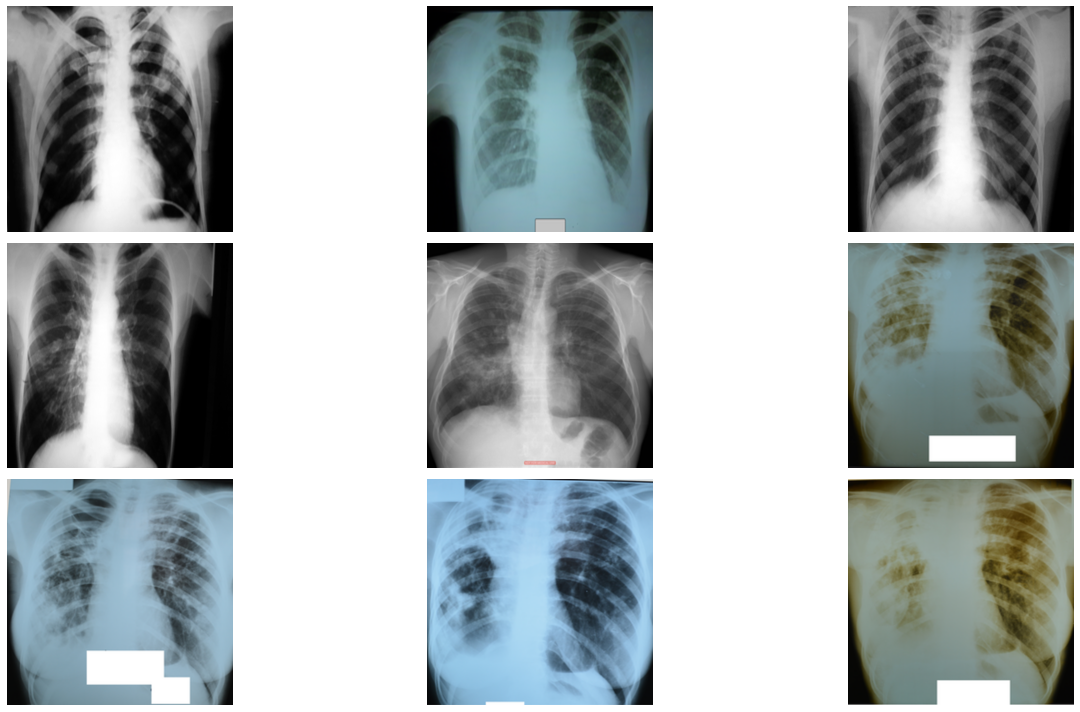

In [3]:
train_dir = "dataxray3/train"
test_dir = "dataxray3/test"
valid_dir = "dataxray3/val"

print("Train set:\n========================================")
num_Tuberculosis = len(os.listdir(os.path.join(train_dir, 'Tuberculosis')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"Tuberculosis={num_Tuberculosis}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"Tuberculosis={len(os.listdir(os.path.join(test_dir, 'Tuberculosis')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"Tuberculosis={len(os.listdir(os.path.join(valid_dir, 'Tuberculosis')))}")
print(f"NORMAL={len(os.listdir(os.path.join(valid_dir, 'NORMAL')))}")

Tuberculosis = os.listdir("dataxray3/train/Tuberculosis")
Tuberculosis_dir = "dataxray3/train/Tuberculosis"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(Tuberculosis_dir, Tuberculosis[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

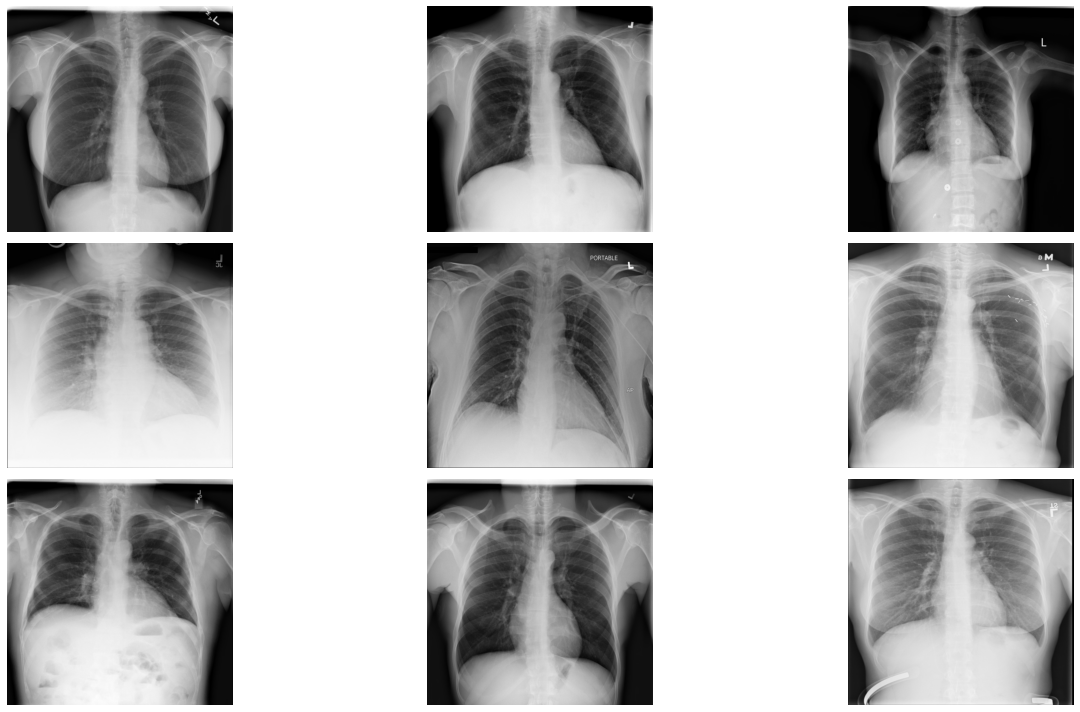

In [4]:
normal = os.listdir("dataxray3/train/NORMAL")
normal_dir = "dataxray3/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

an sample to knowing shape,channel of images  before make data loaders for the model

The dimensions of the image are 512 pixels width and 512 pixels height, one single color channel.
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.4258 and the standard deviation is 0.2400


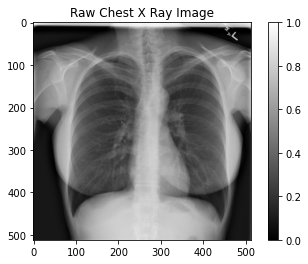

In [5]:
normal_img = os.listdir("dataxray3/train/NORMAL")[0]
normal_dir = "dataxray3/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Image Preprocessing and some preprocessing before trainning 


Our first step is to modify your images so that they are better suited for training a convolutional neural network. To do this, we'll use the Keras ImageDataGenerator function to perform data preprocessing 

In [6]:
from keras.preprocessing.image import ImageDataGenerator


In [7]:

image_generator = ImageDataGenerator(
    
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Build a separate generator fo validation sets and test sets

In [8]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(valid_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 2250 images belonging to 2 classes.
Found 350 images belonging to 2 classes.
Found 398 images belonging to 2 classes.


# Building a CNN model


In [9]:
# Class weights

weight_for_0 = num_Tuberculosis / (num_normal + num_Tuberculosis)
weight_for_1 = num_normal / (num_normal + num_Tuberculosis)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.47
Weight for class 1: 0.53


# Building a CNN model  


this model need shape to be (180,180,3)  , our data sets was (512,512) and one channel so we reshape it above in generator


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 178, 178, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 176, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                        

# Train  and validate the model 


Train and Validate the Model


In [12]:
r = model.fit(
    train, 
    epochs=20,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=20,
)

Epoch 1/20
100/100 [==============================] - 119s 1s/step - loss: 0.9592 - accuracy: 0.8275 - val_loss: 1.9073 - val_accuracy: 0.5500
Epoch 2/20
100/100 [==============================] - 114s 1s/step - loss: 0.3763 - accuracy: 0.8925 - val_loss: 2.3809 - val_accuracy: 0.6000
Epoch 3/20
100/100 [==============================] - 106s 1s/step - loss: 0.2504 - accuracy: 0.9112 - val_loss: 1.9488 - val_accuracy: 0.9500
Epoch 4/20
100/100 [==============================] - 105s 1s/step - loss: 0.1468 - accuracy: 0.9162 - val_loss: 7.7737 - val_accuracy: 0.8500
Epoch 5/20
100/100 [==============================] - 108s 1s/step - loss: 0.1040 - accuracy: 0.9275 - val_loss: 2.6712 - val_accuracy: 0.9000
Epoch 6/20
100/100 [==============================] - 105s 1s/step - loss: 0.1530 - accuracy: 0.9408 - val_loss: 1.6016 - val_accuracy: 0.7500
Epoch 7/20
100/100 [==============================] - 107s 1s/step - loss: 0.1042 - accuracy: 0.9312 - val_loss: 2.9941 - val_accuracy: 0.9000

# evaluate accurecy of the model 

use model evaluate in keras to evaluate model accurecy with test datasets 

In [21]:

evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

398/398 [==============================] - 16s 39ms/step - loss: 0.1649 - accuracy: 0.9573
Test Accuracy: 95.73%
282/282 [==============================] - 72s 256ms/step - loss: 0.0595 - accuracy: 0.9773
Train Accuracy: 97.73%


Save the final model parameters at filepath 'saved_model.h5'.

In [22]:
directory = "./saved_model7.h5"
model.save(directory)

# make a model prediction for some samples 

test model with samples of x-ray image and predict if it tuberculosis or normal

In [23]:
var_tuple3=test[16]
var_tuple3

(array([[[[-0.7812444 , -0.7812444 , -0.7812444 ],
          [-1.7252804 , -1.7252804 , -1.7252804 ],
          [-2.2974234 , -2.2974234 , -2.2974234 ],
          ...,
          [-1.8683162 , -1.8683162 , -1.8683162 ],
          [-1.8111018 , -1.8111018 , -1.8111018 ],
          [-1.7538875 , -1.7538875 , -1.7538875 ]],
 
         [[-0.8098516 , -0.8098516 , -0.8098516 ],
          [-1.7252804 , -1.7252804 , -1.7252804 ],
          [-2.3546376 , -2.3546376 , -2.3546376 ],
          ...,
          [-2.7265306 , -2.7265306 , -2.7265306 ],
          [-2.6979234 , -2.6979234 , -2.6979234 ],
          [-2.6693163 , -2.6693163 , -2.6693163 ]],
 
         [[-0.8384587 , -0.8384587 , -0.8384587 ],
          [-1.7824947 , -1.7824947 , -1.7824947 ],
          [-2.3546376 , -2.3546376 , -2.3546376 ],
          ...,
          [-3.1270308 , -3.1270308 , -3.1270308 ],
          [-3.1270308 , -3.1270308 , -3.1270308 ],
          [-3.1270308 , -3.1270308 , -3.1270308 ]],
 
         ...,
 
         [[-

In [16]:
var_s1=var_tuple3[0]
#fuction to show image sample and predict the class of image if tuberculosis or normal 
def predict_tuber(var_s):
     
    img=var_s.reshape(180,180,3)
    plt.imshow(img)
    prediction = model.predict(var_s)

    if prediction < 0.5:
        print('normal')
    else :
        print('tuberculosis')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


normal


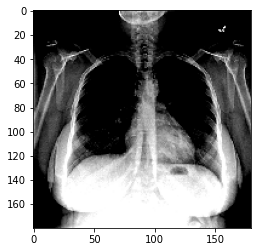

In [17]:
pred= predict_tuber(var_s1)

In [24]:
var_tuple4=test[263]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tuberculosis


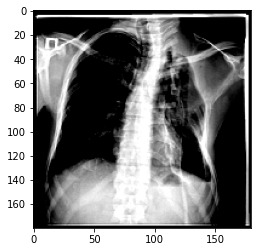

In [25]:
var_s4=var_tuple4[0]
pred= predict_tuber(var_s4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tuberculosis


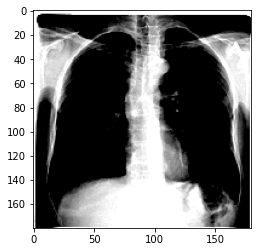

In [28]:
var_s5=test[282][0]
pred= predict_tuber(var_s5)